# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [153]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [154]:
#Code Used:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [155]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [156]:
#Code Used:
north_df.head()
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [157]:
#Code Used:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [158]:
# Code Used:
north_df['Time Block'].value_counts() + south_df['Time Block'].value_counts()

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.987755
> - Not Ready Minutes = 1.914286
> - Incoming Wait Time = 3.048780
> - During Call Wait Time = 2.967347
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.054140
> - Not Ready Minutes = 1.910828
> - Incoming Wait Time = 3.000000
> - During Call Wait Time = 3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, there is some missing data in the 'Incoming Wait Time' column, however, this may be because the callers did not have a wait time. I would not do anything with this data because it could be intentionally missing.

In [159]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


Unnamed: 0: 245
Branch: 1
Call Purpose: 3
Time Block: 9
Incoming or Outgoing: 2
Queue: 2
Rep ID: 9
Sale: 3
Lost Call: 2
Abandoned: 2
Busy Minutes: 5
Not Ready Minutes: 3
Incoming Wait Time: 6
During Call Wait Time: 3
Calls: 1


['Branch', 'Calls']

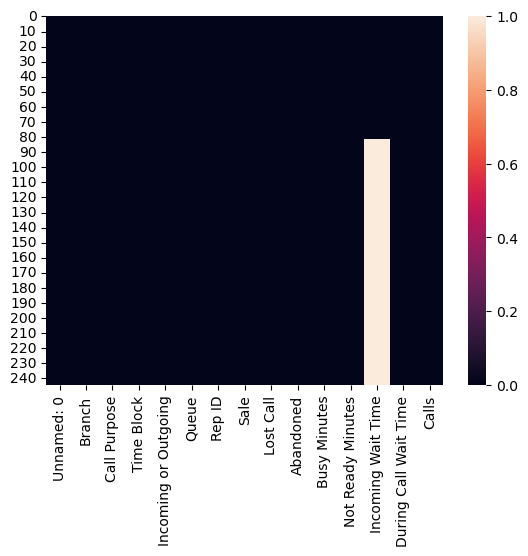

In [160]:
# Code Used
# Add Additional Cells as needed.
sns.heatmap(north_df.isnull())
north_df.describe()
uni_columns = []
for col in north_df:
  print(f"{col}: {len(north_df[col].unique())}")
  if len(north_df[col].unique()) == 1:
        uni_columns.append(col)
uni_columns
# df = df.drop(axis=1, columns=uni_columns)
# print(north_df.shape)

0.5987261146496815

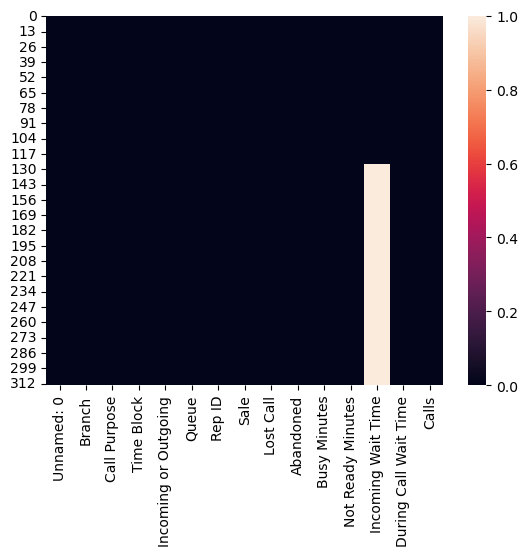

In [161]:
sns.heatmap(south_df.isnull())
pct_missing = np.mean(south_df['Incoming Wait Time'].isnull(), axis=0)
pct_missing

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I created a function that converted the different YES into the same YES.

In [162]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()

def sales(series):
    if series == 'YES':
        return 'YES'
    elif series == 'NO':
        return 'NO'
    else:
        return 'YES'

north_df['Sale'] = north_df['Sale'].apply(sales)
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [163]:
south_df.head()
uni_columns1 = []
for col in south_df:
  print(f"{col}: {len(south_df[col].unique())}")
  if len(south_df[col].unique()) == 1:
        uni_columns1.append(col)
uni_columns1

Unnamed: 0: 314
Branch: 1
Call Purpose: 3
Time Block: 9
Incoming or Outgoing: 2
Queue: 2
Rep ID: 11
Sale: 2
Lost Call: 2
Abandoned: 2
Busy Minutes: 5
Not Ready Minutes: 3
Incoming Wait Time: 6
During Call Wait Time: 3
Calls: 1


['Branch', 'Calls']

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I did not see any duplicates in either data set.

In [164]:
#Code Used
# Add Additional Cells as needed.
north_df.duplicated().value_counts()
south_df.duplicated().value_counts()

False    314
dtype: int64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I think all of the data in both dataframes is necessary to have a complete snapshot of the call centers.

In [165]:
#Code Used
# Add Additional Cells as needed.
north_df.head()
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [166]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])
print(north_df.shape, south_df.shape)

df.head()

(245, 15) (314, 15)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [167]:
df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [168]:
# Code Used
# Add Additional Cells as needed.
reps = df.groupby(['Rep ID', 'Branch'])
reps.sum().sort_values('Calls', ascending=False)

,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Brent,North,4840,0,1,362,71,17.0,117,37
Eric,South,5039,0,0,361,54,47.0,112,35
Randy,South,4576,3,1,320,66,47.0,98,33
Sandy,South,4694,1,0,325,60,34.0,100,32
Helga,South,5236,0,2,292,58,36.0,95,31
Lilly,North,3375,0,2,307,59,37.0,88,30
Todd,North,4252,1,0,296,58,21.0,97,29
Duke,North,2999,2,0,292,56,39.0,85,29
George,South,4620,0,0,298,53,41.0,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Technically, the company and South Branch are outside of the optimal range because they are lower than 2%.

In [169]:
# Code Used
# Add Additional Cells as needed.

abandoned_calls = df.groupby('Branch').agg('mean')
abandoned_calls['Abandoned']*100

# North = 2.86%
# South = 1.27%

Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64

In [170]:
total_abandoned_calls = df['Abandoned'].mean()
total_abandoned_calls*100

# total = 1.97%

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% of calls (33 out of 82 calls)
- South Branch = 38.10% of calls (48 out of 126 calls)
- Company Wide = 38.94% of calls (81 out of 208 calls)

In [211]:
# Code Used
# Add Additional Cells as needed.

service_level = df.groupby('Branch')
service_level['Incoming Wait Time'].describe()
service_level['Incoming Wait Time'].value_counts() # North == 33, South == 38


# sum the number of calls whose wait time was 2 seconds
service_level_2 = df[df['Incoming Wait Time'] <= 2.0]
service_level_2 = service_level_2.groupby('Branch').count()
print(f"Number of calls with wait times within 2 seconds by Branch: {service_level_2['Incoming Wait Time']}""\n")

# sum of all call times for each branch
service_level_sum = service_level['Incoming Wait Time'].count()
print(f"Total number of calls for each branch: {service_level_sum}""\n")

# percentage of calls for each branch that are within 2 seconds
service_level_pct = (service_level_2['Incoming Wait Time']/service_level_sum)*100
print(f"Percentage of calls with wait times within 2 seconds by Branch: {service_level_pct}""\n")

# total number of 'Incoming Wait Time' values within 2 seconds
company_service_level_2 = df[df['Incoming Wait Time'] <= 2].count()
company_service_level_2['Incoming Wait Time']

# percentage of calls company wide within 2 seconds
company_service_level_pct = (company_service_level_2['Incoming Wait Time']/df['Incoming Wait Time'].count())*100
print(f"Percentage of calls company wide within 2 seconds: {company_service_level_pct}")

Number of calls with wait times within 2 seconds by Branch: Branch
North    33
South    48
Name: Incoming Wait Time, dtype: int64

Total number of calls for each branch: Branch
North     82
South    126
Name: Incoming Wait Time, dtype: int64

Percentage of calls with wait times within 2 seconds by Branch: Branch
North    40.243902
South    38.095238
Name: Incoming Wait Time, dtype: float64

Percentage of calls company wide within 2 seconds: 38.94230769230769


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [222]:
# Code Used 
speed = df.groupby(['Branch', 'Incoming or Outgoing'])
speed['Incoming Wait Time'].describe()

count     mean       std  min  25%  50%  75%  max
Branch Incoming or Outgoing                                                   
North  Incoming               82.0  3.04878  1.456382  1.0  2.0  3.0  4.0  5.0
       Outgoing                0.0      NaN       NaN  NaN  NaN  NaN  NaN  NaN
South  Incoming              126.0  3.00000  1.308434  1.0  2.0  3.0  4.0  5.0
       Outgoing                0.0      NaN       NaN  NaN  NaN  NaN  NaN  NaN

In [215]:
df['Incoming Wait Time'].agg('mean')

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because we are comparing the queues averages directly, and there are only 4 groups.

<BarContainer object of 4 artists>

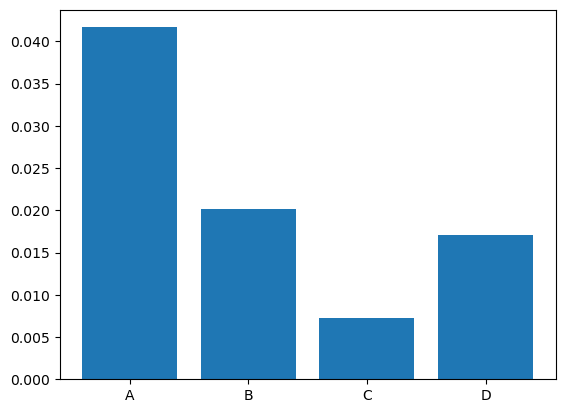

In [257]:
# Create visualization 1 here
# Import any additional libraries needed with alias


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
abandonment_rates = list(abandonment_rates.values())
plt.bar(queues, abandonment_rates)

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to do two bar charts for this. I could not put them both on the same chart because they have very different values for the y-axis. I used bar charts because they can easily directly compare the service level percentages and average speeds of each rep.

,Rep ID,Calls_x,Calls_y,Service Level %
0,Amanda,3,5,60.000000
1,Andy,3,10,30.000000
2,Brent,6,8,75.000000
3,Cam,5,11,45.454545
4,Duke,6,14,42.857143
5,Joe,2,10,20.000000
6,Lilly,4,12,33.333333
7,Todd,2,6,33.333333
8,Xander,2,6,33.333333


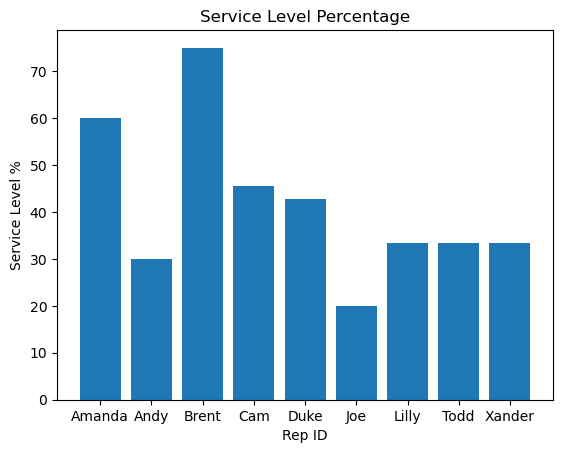

In [285]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level = service_level.reset_index()
plt.bar(service_level['Rep ID'], service_level['Service Level %'])
plt.title('Service Level Percentage')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')

Text(0, 0.5, 'Rep')

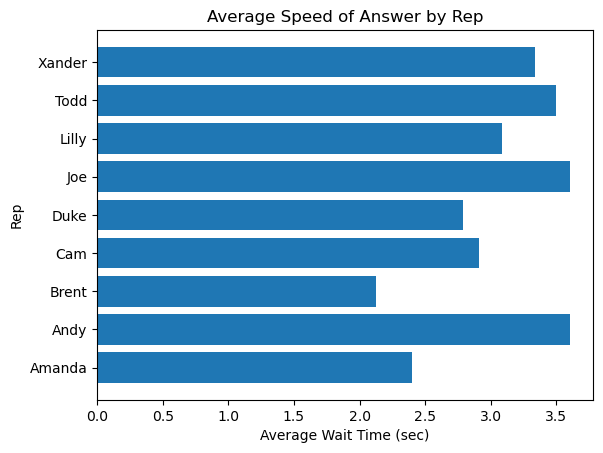

In [356]:
north_plt
plt.barh(north_plt['Rep ID'], north_plt['Incoming Wait Time'])
plt.title('Average Speed of Answer by Rep')
plt.xlabel('Average Wait Time (sec)')
plt.ylabel('Rep')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I chose to use a grouped bar chart for outgoing vs incoming call and purpose because there were three different things to look at (incoming vs outgoing, purpose of call, and number of calls), but could be grouped by purpose.

<AxesSubplot:xlabel='Call Purpose', ylabel='Number of Calls'>

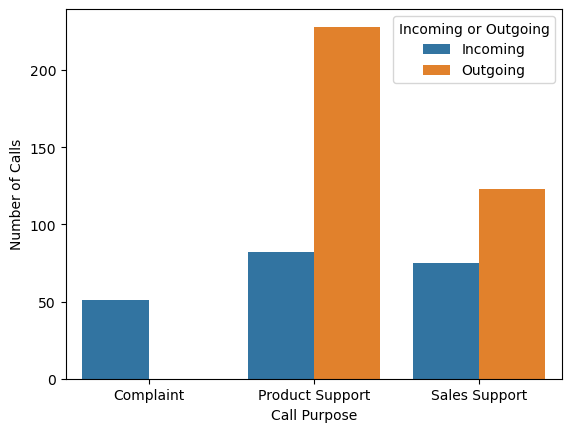

In [354]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_counts = pd.DataFrame(purpose_counts)
purpose_counts = purpose_counts.rename(columns={ purpose_counts.columns[0]: "Number of Calls" }).reset_index()
sns.barplot(x='Call Purpose', y='Number of Calls', hue='Incoming or Outgoing', data=purpose_counts)

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
In my opinion, the south branch operates more efficiently. They have lower average abandonment rates (see visualization 1: south branch queues C and D perform much better than A and B)  and a better average speed of answer (3.00 to north branch's 3.05). South branch technically have a lower service level percentage, but they answer more calls.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: I think North branch could use an extra rep. They do very well with having 2 less reps than South branch, but an extra person could help their metrics better compare to south branch.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: The only information that I think could be more helpful is to have how long each call takes, based on the purpose, to see if some reps are faster at sales, fixing problems, or answering questions.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '10:00 AM'),
  Text(1, 0, '11:00 AM'),
  Text(2, 0, '12:00 PM'),
  Text(3, 0, '1:00 PM'),
  Text(4, 0, '2:00 PM'),
  Text(5, 0, '3:00 PM'),
  Text(6, 0, '4:00 PM'),
  Text(7, 0, '5:00 PM'),
  Text(8, 0, '9:00 AM')])

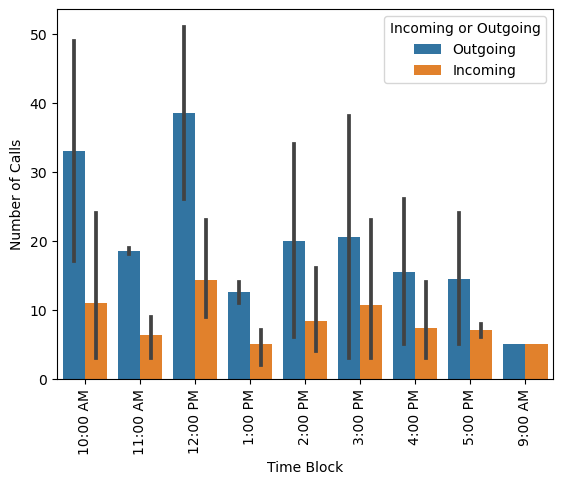

In [407]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:
call_times = call_times.groupby('Time Block').value_counts()
call_times = pd.DataFrame(call_times).reset_index()
call_times = call_times.rename(columns={call_times.columns[-1]: "Number of Calls" })
# Use groupby and get_group to select which call purpose to plot:
# call_times.groupby('Time Block').get_group('')
sns.barplot(x='Time Block', y='Number of Calls', hue='Incoming or Outgoing', data=call_times)
plt.xticks(rotation=90)